Explained Variance Ratio: [0.11581135 0.09660851 0.08451335 0.06999434 0.06415327 0.05649707
 0.05558684 0.05446048 0.05292051 0.04468324 0.04252338 0.04108741
 0.0388542  0.03774879 0.02554537 0.02182198 0.01979523 0.01853185
 0.01648027 0.01047159 0.00779108 0.00702055 0.00586062 0.0053142
 0.00300617 0.00135506 0.00109531 0.00046797]


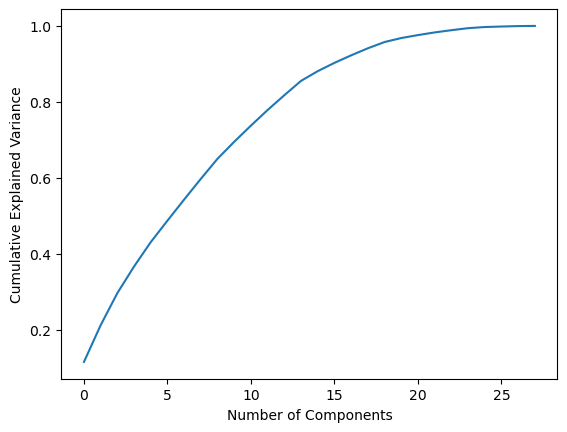

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import MLPfunctions as mlp

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Test some data manipulation techniques with the models to see if they give any improvements
dataset = pd.read_csv('HIGGS_train.csv')
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

# Standardize the features
# The standard scaler will normalize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the explained variance ratio
# This tells us how much variance is explained by each component
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
# Plot the cumulative sum of explained variances
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [2]:
# If we decide to simply the number of features we could probably rmeove the last features and achieve similar results
# Lets see how the SVM does if we normalize the data and remove the last 8 features
# First shrink the dataset to 10,000 samples
X_reduced = X[:10000]
y_reduced = y[:10000]

X_remove_features = X[:, :-8]
X_remove_features = X_remove_features[:10000]

X_scaled = scaler.fit_transform(X_reduced)

X_scaled_removed = scaler.fit_transform(X_remove_features)

# Compare the features scaled vs unscaled
print("Original data")
print(X_reduced[0])
print("Scaled")
print(X_scaled[0])

# First see how a SVM does with the original data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=0)
SVM = SVC(kernel='linear', C=26) # optimal c value found in SVM.ipynb
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("Original data")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Now see how the SVM does with the normalized data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_reduced, test_size=0.2, random_state=0)
SVM = SVC(kernel='linear', C=26) # optimal c value found in SVM.ipynb
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("Scaled")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Now see how the SVM does with the removed features
X_train, X_test, y_train, y_test = train_test_split(X_remove_features, y_reduced, test_size=0.2, random_state=0)
SVM = SVC(kernel='linear', C=26) # optimal c value found in SVM.ipynb
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("Removed features")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Now see how the SVM does with the normalized data AND removed features
X_train, X_test, y_train, y_test = train_test_split(X_scaled_removed, y_reduced, test_size=0.2, random_state=0)
SVM = SVC(kernel='linear', C=26) # optimal c value found in SVM.ipynb
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("Scaled AND removed")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Original data
[ 0.41854182 -0.2415984  -1.01952386  1.30763304 -0.27344593  0.72168165
  0.89019126  0.87219322  2.17307615  0.6058476   0.8888672  -0.71482676
  2.21487212  0.40744153 -0.52595085 -1.58341444  0.          1.19634616
  0.78156036  1.51641333  0.          0.69297081  0.74229103  0.98279983
  1.13241017  0.96347362  1.16195118  0.98038757]
Scaled
[-1.02530023 -0.24216472 -1.03180267  0.51139141 -0.26385413 -0.56415579
  0.85959287  0.87170657  1.14781331 -0.77578137  0.89426997 -0.69954867
  1.1528356  -1.21984239 -0.53312907 -1.59968291 -0.84157447  0.39601748
  0.7766637   1.50221579 -0.70681577 -0.49429855 -0.74668218 -0.4136671
  0.32857849 -0.02441459  0.3661743   0.07431653]
Original data
Accuracy: 0.6615
F1 Score: 0.7203634861627427
Scaled
Accuracy: 0.6625
F1 Score: 0.7209590739975197
Removed features
Accuracy: 0.5525
F1 Score: 0.6113764654798091
Scaled AND removed
Accuracy: 0.5515
F1 Score: 0.6101694915254238


In [26]:
# Scaling has little effect on the SVM, but removing the last 8 features does have a significant effect
# Lets try scaling the features with the MLP
# Use 10 % of the original data 
dataset_small = dataset.sample(frac=0.1)
# Scale the features
scaler = StandardScaler()
dataset_small.iloc[:, 1:] = scaler.fit_transform(dataset_small.iloc[:, 1:])
# Set aside a validation set
data_val = dataset_small.sample(frac=0.2)
dataset_small.drop(data_val.index, inplace=True)
X_val = data_val.iloc[:, 1:].values
y_val = data_val.iloc[:, 0].values
# Split the data into features and labels
X = dataset_small.iloc[:, 1:].values
y = dataset_small.iloc[:, 0].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train,)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)


Epoch 1/2000, Train Loss: 0.6967359781265259, Test Loss: 0.6887954473495483
Epoch 2/2000, Train Loss: 0.689024031162262, Test Loss: 0.683764636516571
Epoch 3/2000, Train Loss: 0.6832301616668701, Test Loss: 0.6641991138458252
Epoch 4/2000, Train Loss: 0.6640693545341492, Test Loss: 0.6554692983627319
Epoch 5/2000, Train Loss: 0.6556695699691772, Test Loss: 0.6459445357322693
Epoch 6/2000, Train Loss: 0.646474301815033, Test Loss: 0.6406245827674866
Epoch 7/2000, Train Loss: 0.641226589679718, Test Loss: 0.6339150667190552
Epoch 8/2000, Train Loss: 0.6339511275291443, Test Loss: 0.6315097212791443
Epoch 9/2000, Train Loss: 0.6312470436096191, Test Loss: 0.6261215806007385
Epoch 10/2000, Train Loss: 0.6262153387069702, Test Loss: 0.6249470114707947
Epoch 11/2000, Train Loss: 0.6250569224357605, Test Loss: 0.621511697769165
Epoch 12/2000, Train Loss: 0.6215640306472778, Test Loss: 0.6193321347236633
Epoch 13/2000, Train Loss: 0.6194851994514465, Test Loss: 0.6155552268028259
Epoch 14/2000

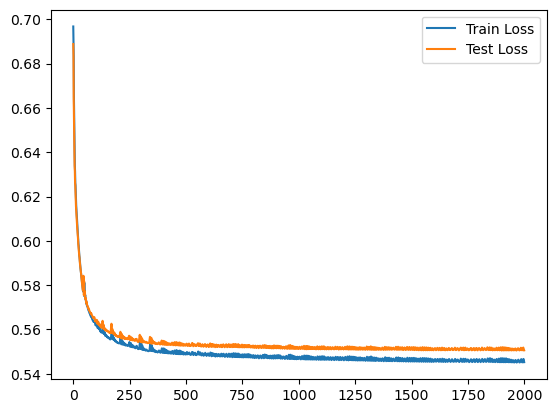

F1:0.7604899190550044
Accuracy:0.7437840909090909
Confusion Matrix:
[[59315 23631]
 [21463 71591]]


In [27]:
# Try the faster mach1 model with a hidden size of 30
# Create the model
hidden_size = 30
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .05
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 2000
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)


Epoch 1/1000, Train Loss: 0.7021181583404541, Test Loss: 0.6898472309112549
Epoch 2/1000, Train Loss: 0.6931467652320862, Test Loss: 0.6867151260375977
Epoch 3/1000, Train Loss: 0.6883996725082397, Test Loss: 0.6758623123168945
Epoch 4/1000, Train Loss: 0.6781584024429321, Test Loss: 0.6619396209716797
Epoch 5/1000, Train Loss: 0.6674407720565796, Test Loss: 0.6517105102539062
Epoch 6/1000, Train Loss: 0.6628929376602173, Test Loss: 0.6430090069770813
Epoch 7/1000, Train Loss: 0.6526959538459778, Test Loss: 0.6389197707176208
Epoch 8/1000, Train Loss: 0.647075355052948, Test Loss: 0.6353375315666199
Epoch 9/1000, Train Loss: 0.6432005167007446, Test Loss: 0.6295318007469177
Epoch 10/1000, Train Loss: 0.6382279396057129, Test Loss: 0.6233987212181091
Epoch 11/1000, Train Loss: 0.6342834830284119, Test Loss: 0.6181901693344116
Epoch 12/1000, Train Loss: 0.6297228932380676, Test Loss: 0.6146875023841858
Epoch 13/1000, Train Loss: 0.6255046129226685, Test Loss: 0.6130881905555725
Epoch 14/

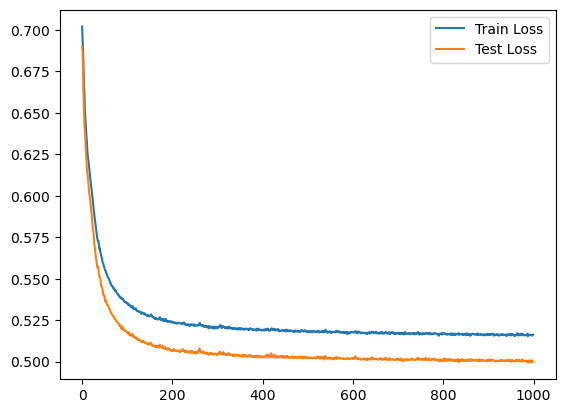

F1:0.7658224128812364
Accuracy:0.7509375
Confusion Matrix:
[[60489 22457]
 [21378 71676]]


In [28]:
# The effect is small, but lets see how it affects the more complex MLP
model2 = mlp.MLP_mach2(28, 90, 60, 30, 10, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .02
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model2, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model2, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

# Normalizing the data is much faster for training, but decreases the f1 and accuracy of the models

# Attempt at creating new features using cyclic encoding of the angles
There are two types of angles in the features 'eta' which represents pseudorapidity and 'phi' which represents the azimuthal angle.
Pseudorapidity is the measure of the angle of a particle in relation to the beam axis (path of acceleration) denoted: η=−ln(tan(0/2)).
The azimuthal angle is the angle between the transverse momentum vector and the horizontal (x) axis. The azimuthal angle is cyclical in nature, so below I took the sin and cosine of the angles to attempt to capture this.

I became interested in trying this process after finding this notebook on Kaggle, and adopted it to my data:
https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning


In [5]:
# Turn the data into a DataFrame
X_cyclic = pd.DataFrame(X, columns=dataset.columns[1:])
# Cyclic encoding for angular features
angular_feats = ['lepton phi', 'missing energy phi', 'jet 1 phi', 'jet 2 phi', 'jet 3 phi', 'jet 4 phi']

for feat in angular_feats:
    sin = feat + '_sin'
    cos = feat + '_cos'
    X_cyclic = X_cyclic.assign(**{sin: np.sin(X_cyclic[feat]) * np.pi/180})
    X_cyclic = X_cyclic.assign(**{cos: np.cos(X_cyclic[feat]) * np.pi/180})

# Drop original angular columns from X
X_cyclic = X_cyclic.drop(angular_feats, axis=1)

# Print the columns of X_small
print(X_cyclic.columns)
# Standardize features
scaler = StandardScaler()
X_cyclic = pd.DataFrame(scaler.fit_transform(X_cyclic), columns=X_cyclic.columns)

# Make a small version for the SVM
X_small = X_cyclic[:10000]
y_small = y[:10000]

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=0)

# Fit SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = svm_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Index(['lepton pT', 'lepton eta', 'missing energy magnitude', 'jet 1 pt',
       'jet 1 eta', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 b-tag',
       'jet 3 pt', 'jet 3 eta', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta',
       'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb',
       'm_wwbb', 'lepton phi_sin', 'lepton phi_cos', 'missing energy phi_sin',
       'missing energy phi_cos', 'jet 1 phi_sin', 'jet 1 phi_cos',
       'jet 2 phi_sin', 'jet 2 phi_cos', 'jet 3 phi_sin', 'jet 3 phi_cos',
       'jet 4 phi_sin', 'jet 4 phi_cos'],
      dtype='object')
Accuracy: 0.66
F1 Score: 0.6996466431095406


In [47]:
# Print the new angular features (columns that end in _sin or _cos)

print(X_cyclic.filter(regex='(_sin$|_cos$)')).head()
# While this didn't help much, it showed that the SVM didn't need the angular features to perform well
# Lets try it now with an MLP

        lepton phi_sin  lepton phi_cos  missing energy phi_sin  \
0             0.012081        0.012597                0.008312   
1             0.009263        0.014792               -0.017445   
2             0.013756        0.010742                0.017438   
3             0.004972        0.016730               -0.012335   
4            -0.011708        0.012944                0.010540   
...                ...             ...                     ...   
703995        0.017429       -0.000924                0.010350   
703996        0.004555        0.016848                0.016285   
703997        0.017188        0.003033                0.004004   
703998        0.001749        0.017365               -0.017215   
703999       -0.017228        0.002795               -0.004023   

        missing energy phi_cos  jet 1 phi_sin  jet 1 phi_cos  jet 2 phi_sin  \
0                     0.015347      -0.017451       0.000275      -0.003140   
1                     0.000544      -0.007090    

AttributeError: 'NoneType' object has no attribute 'head'

In [6]:
# Lets try training the MLP with the new features
# Take 10% of the data with cyclic features
X_cyclic = X_cyclic.to_numpy()
X_cyclic_small = X_cyclic[:500000]
y_small = y[:500000]
# Get some validation data too
X_val = X_cyclic[500000:560000]
y_val = y[500000:560000]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cyclic_small, y_small, test_size=0.2)
# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)

Epoch 1/2000, Train Loss: 0.6952773332595825, Test Loss: 0.6929298639297485
Epoch 2/2000, Train Loss: 0.6939306855201721, Test Loss: 0.6918348670005798
Epoch 3/2000, Train Loss: 0.6927956342697144, Test Loss: 0.6909483671188354
Epoch 4/2000, Train Loss: 0.6918802261352539, Test Loss: 0.6902122497558594
Epoch 5/2000, Train Loss: 0.6910377144813538, Test Loss: 0.689534604549408
Epoch 6/2000, Train Loss: 0.6902887225151062, Test Loss: 0.6888611912727356
Epoch 7/2000, Train Loss: 0.6896274089813232, Test Loss: 0.6881662011146545
Epoch 8/2000, Train Loss: 0.6888605356216431, Test Loss: 0.6874213218688965
Epoch 9/2000, Train Loss: 0.6881633400917053, Test Loss: 0.6865980625152588
Epoch 10/2000, Train Loss: 0.6873546838760376, Test Loss: 0.6856683492660522
Epoch 11/2000, Train Loss: 0.6865410804748535, Test Loss: 0.6846210360527039
Epoch 12/2000, Train Loss: 0.685583770275116, Test Loss: 0.6834548711776733
Epoch 13/2000, Train Loss: 0.684407114982605, Test Loss: 0.6821772456169128
Epoch 14/20

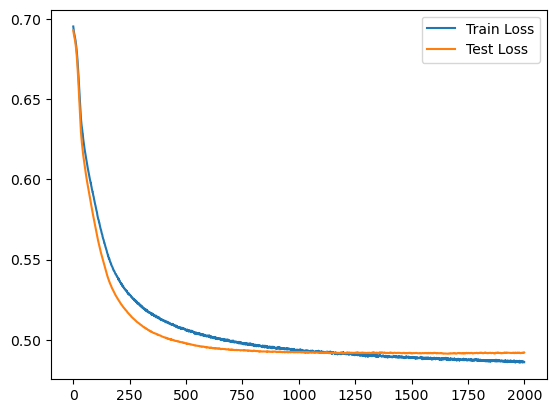

F1:0.7717710785897851
Accuracy:0.7528166666666667
Confusion Matrix:
[[20093  8118]
 [ 6713 25076]]


In [50]:
# The effect is small, but lets see how it affects the more complex MLP
#model2 = mlp.MLP_mach2(34, 110, 80, 50, 20, 0.1)
model2 = mlp.MLP_mach2(34, 200, 180, 160, 100, 0.1)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
n_epochs = 2000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model2, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model2, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/100, Train Loss: 0.6933520436286926, Test Loss: 0.6921954154968262
Epoch 2/100, Train Loss: 0.6922386884689331, Test Loss: 0.6910549998283386
Epoch 3/100, Train Loss: 0.691271960735321, Test Loss: 0.6895449757575989
Epoch 4/100, Train Loss: 0.6901150941848755, Test Loss: 0.6869624853134155
Epoch 5/100, Train Loss: 0.6881188154220581, Test Loss: 0.6829071640968323
Epoch 6/100, Train Loss: 0.6845371127128601, Test Loss: 0.6776922941207886
Epoch 7/100, Train Loss: 0.6796800494194031, Test Loss: 0.6702744364738464
Epoch 8/100, Train Loss: 0.6731711626052856, Test Loss: 0.6630072593688965
Epoch 9/100, Train Loss: 0.6663006544113159, Test Loss: 0.661383330821991
Epoch 10/100, Train Loss: 0.6645832657814026, Test Loss: 0.6573426723480225
Epoch 11/100, Train Loss: 0.6624496579170227, Test Loss: 0.6508567333221436
Epoch 12/100, Train Loss: 0.6561242938041687, Test Loss: 0.6525108814239502
Epoch 13/100, Train Loss: 0.6577282547950745, Test Loss: 0.6458961963653564
Epoch 14/100, Train Los

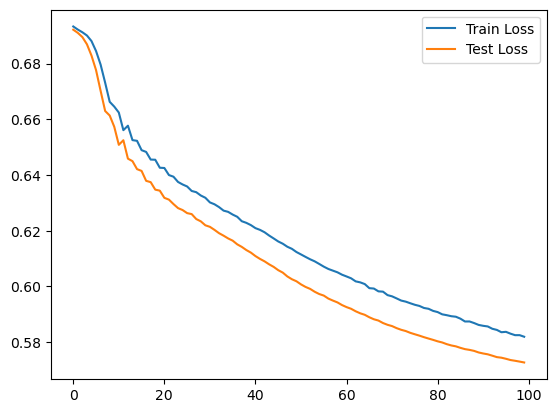

F1:0.7322523893300366
Accuracy:0.71845
Confusion Matrix:
[[20007  8123]
 [ 8770 23100]]


In [9]:
model3 = mlp.MLP_mach3(34, 300, 300, 300, 300, 300, 300, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model3.parameters(), lr=lr)
n_epochs = 100
# Train the model using our function
train_losses, test_losses = mlp.train_model(model3, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model3, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)